In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Grid size
GRID_SIZE = 100

# Actions and their movement effects (Up, Down, Left, Right)
actions = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Initialize grid with empty cells
grid = np.zeros((GRID_SIZE, GRID_SIZE))

# Add random obstacles
obstacle_percentage = 0.2  # 20% of the grid cells will have obstacles
num_obstacles = int(GRID_SIZE * GRID_SIZE * obstacle_percentage)
obstacles = random.sample(range(GRID_SIZE * GRID_SIZE), num_obstacles)
for obs in obstacles:
    x, y = divmod(obs, GRID_SIZE)
    grid[x, y] = -1  # Mark obstacles with -1

# Define start and goal states
start = (0, 0)
goal = (GRID_SIZE - 1, GRID_SIZE - 1)
grid[goal] = 1  # Goal state marked with +1

# Reward system
def get_reward(state):
    if state == goal:
        return 100  # High reward at the goal
    elif grid[state] == -1:
        return -100  # Large penalty for obstacles
    else:
        return -1  # Slight negative reward for every step taken


In [2]:
# Parameters for Q-learning
alpha = 0.1      # Learning rate
gamma = 0.9      # Discount factor
epsilon = 0.2    # Exploration rate
num_episodes = 500  # Number of episodes to train

# Initialize Q-table
q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(actions)))

# Function to choose action based on epsilon-greedy strategy
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(list(actions.keys()))
    else:
        x, y = state
        action_idx = np.argmax(q_table[x, y])
        return list(actions.keys())[action_idx]

# Q-learning function
def q_learning(start, goal, q_table, num_episodes, alpha, gamma, epsilon):
    for episode in range(num_episodes):
        state = start
        while state != goal:
            x, y = state
            action_name = choose_action(state, epsilon)
            dx, dy = actions[action_name]
            next_state = (max(0, min(x + dx, GRID_SIZE - 1)), max(0, min(y + dy, GRID_SIZE - 1)))
            
            if grid[next_state] == -1:  # Obstacle handling
                reward = -100
                next_state = state
            else:
                reward = get_reward(next_state)
            
            best_future_q = np.max(q_table[next_state[0], next_state[1]])
            action_index = list(actions.keys()).index(action_name)
            
            # Q-learning update rule
            q_table[x, y, action_index] = q_table[x, y, action_index] + alpha * (
                reward + gamma * best_future_q - q_table[x, y, action_index]
            )
            
            # Move to the next state
            state = next_state
    return q_table

# Train Q-learning agent
trained_q_table = q_learning(start, goal, q_table, num_episodes, alpha, gamma, epsilon)
print("Training complete!")


Training complete!


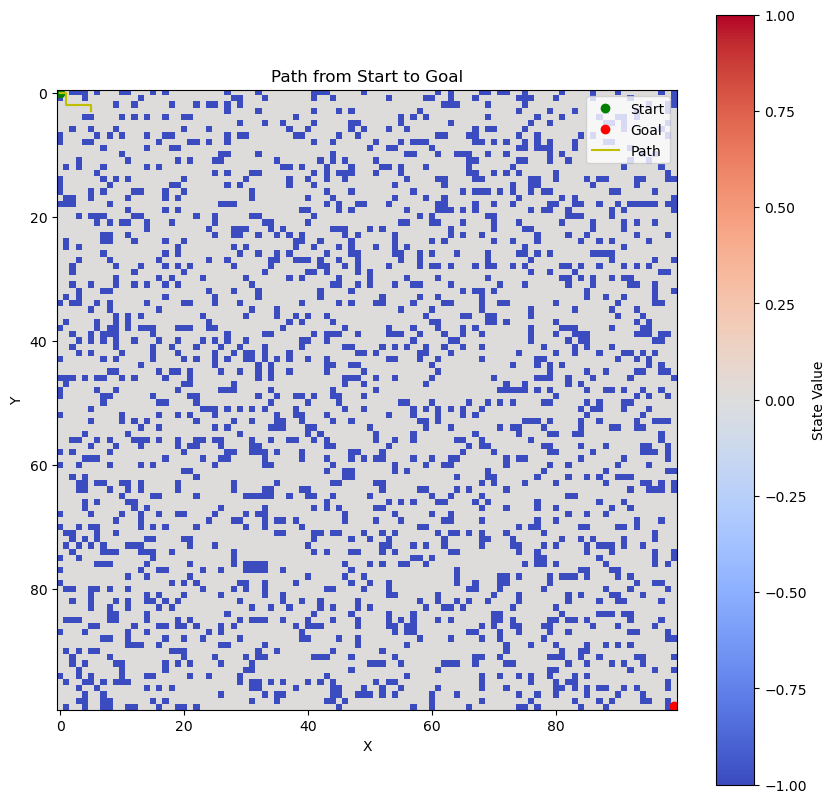

In [3]:
# Function to visualize the path from start to goal
def visualize_path(start, goal, q_table):
    path = [start]
    state = start
    
    while state != goal:
        x, y = state
        action_index = np.argmax(q_table[x, y])
        action_name = list(actions.keys())[action_index]
        dx, dy = actions[action_name]
        next_state = (max(0, min(x + dx, GRID_SIZE - 1)), max(0, min(y + dy, GRID_SIZE - 1)))
        
        # Avoid loops by stopping if stuck
        if next_state in path:
            break
        path.append(next_state)
        state = next_state

    # Plot the grid and path
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap='coolwarm', origin='upper')
    plt.colorbar(label='State Value')
    
    # Plot start and goal
    plt.plot(start[1], start[0], 'go', label="Start")
    plt.plot(goal[1], goal[0], 'ro', label="Goal")
    
    # Plot path
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, 'y-', label="Path")
    plt.legend()
    plt.title("Path from Start to Goal")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Visualize the agent's path
visualize_path(start, goal, trained_q_table)
